![tower bridge](london.jpg)

London, or as the Romans called it "Londonium"! Home to [over 8.5 million residents](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationandhouseholdestimatesenglandandwales/census2021unroundeddata#population-and-household-estimates-england-and-wales-data) who speak over [300 languages](https://web.archive.org/web/20080924084621/http://www.cilt.org.uk/faqs/langspoken.htm). While the City of London is a little over one square mile (hence its nickname "The Square Mile"), Greater London has grown to encompass 32 boroughs spanning a total area of 606 square miles! 

![underground train leaving a platform](tube.jpg)

Given the city's roads were originally designed for horse and cart, this area and population growth has required the development of an efficient public transport system! Since the year 2000, this has been through the local government body called **Transport for London**, or *TfL*, which is managed by the London Mayor's office. Their remit covers the London Underground, Overground, Docklands Light Railway (DLR), buses, trams, river services (clipper and [Emirates Airline cable car](https://en.wikipedia.org/wiki/London_cable_car)), roads, and even taxis.

The Mayor of London's office make their data available to the public [here](https://data.london.gov.uk/dataset). In this project, you will work with a slightly modified version of a dataset containing information about public transport journey volume by transport type. 

The data has been loaded into a **Snowflake** database called `TFL` with a single table called `JOURNEYS`, including the following data:

## TFL.JOURNEYS

| Column | Definition | Data type |
|--------|------------|-----------|
| `MONTH`| Month in number format, e.g., `1` equals January | `INTEGER` |
| `YEAR` | Year | `INTEGER` |
| `DAYS` | Number of days in the given month | `INTEGER` |
| `REPORT_DATE` | Date that the data was reported | `DATE` |
| `JOURNEY_TYPE` | Method of transport used | `VARCHAR` |
| `JOURNEYS_MILLIONS` | Millions of journeys, measured in decimals | `FLOAT` |

Note that *in Snowflake all databases, tables, and columns are **upper case*** by default.

You will execute SQL queries to answer three questions, as listed in the instructions.

In [1]:
-- most_popular_transport_types
--============================================================--
-- Query 1: Most Popular Transport Types in London (2010–2022)
-- Goal: Identify transport types ranked by total journey volume
--============================================================--

SELECT
    JOURNEY_TYPE,                                        -- Transport mode (e.g., Bus, Underground & DLR, etc.)
    SUM(JOURNEYS_MILLIONS) AS TOTAL_JOURNEYS_MILLIONS    -- Total number of journeys across all months/years
FROM
    TFL.JOURNEYS                                          -- Source table from the Snowflake dataset
GROUP BY
    JOURNEY_TYPE                                          -- Aggregate results by transport type
ORDER BY
    TOTAL_JOURNEYS_MILLIONS DESC;                         -- Sort from most to least popular


,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,Bus,24905.193947
1,Underground & DLR,15020.466544
2,Overground,1666.845666
3,TfL Rail,411.313421
4,Tram,314.689875
5,Emirates Airline,14.583718


In [2]:
-- Types of transportation in London according to the database
SELECT DISTINCT JOURNEY_TYPE FROM TFL.JOURNEYS;

,JOURNEY_TYPE
0,Underground & DLR
1,Bus
2,Tram
3,Emirates Airline
4,Overground
5,TfL Rail


In [3]:
--=====================================================================--
-- Query 2: Emirates Airline Cable Car - Top 5 Most Popular Months
-- Goal: Identify the months/years with the highest journey volumes
--=====================================================================--

SELECT
    MONTH,                                                  -- Month number (1 = January)
    YEAR,                                                   -- Corresponding year
    ROUND(JOURNEYS_MILLIONS, 2) AS ROUNDED_JOURNEYS_MILLIONS -- Journeys rounded to 2 decimal places
FROM
    TFL.JOURNEYS                                            -- Source dataset table
WHERE
    JOURNEY_TYPE = 'Emirates Airline'             -- Filter only cable car transport type
    AND JOURNEYS_MILLIONS IS NOT NULL                       -- Exclude any missing data
ORDER BY
    JOURNEYS_MILLIONS DESC                                  -- Sort by journey volume (highest first)
LIMIT 5;                                                    -- Return only the top 5 most popular months

,MONTH,YEAR,ROUNDED_JOURNEYS_MILLIONS
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


In [4]:
--======================================================================--
-- Query 3: Least Popular Years for Underground & DLR Transport Usage
-- Goal: Identify the 5 years with the lowest total journey volumes
--======================================================================--

SELECT
    YEAR,                                                   -- Year of reported journeys
    JOURNEY_TYPE,                                           -- Transport mode (Underground & DLR)
    SUM(JOURNEYS_MILLIONS) AS TOTAL_JOURNEYS_MILLIONS       -- Total journeys in millions for that year
FROM
    TFL.JOURNEYS                                            -- Source dataset table
WHERE
    JOURNEY_TYPE = 'Underground & DLR'                      -- Filter only London Underground & DLR combined usage
GROUP BY
    YEAR, JOURNEY_TYPE                                      -- Aggregate results by year and transport type
ORDER BY
    TOTAL_JOURNEYS_MILLIONS ASC                             -- Sort from lowest to highest
LIMIT 5;                                                    -- Keep only the least popular 5 years


,YEAR,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,2020,Underground & DLR,310.179316
1,2021,Underground & DLR,748.452544
2,2022,Underground & DLR,1064.859009
3,2010,Underground & DLR,1096.145588
4,2011,Underground & DLR,1156.647654


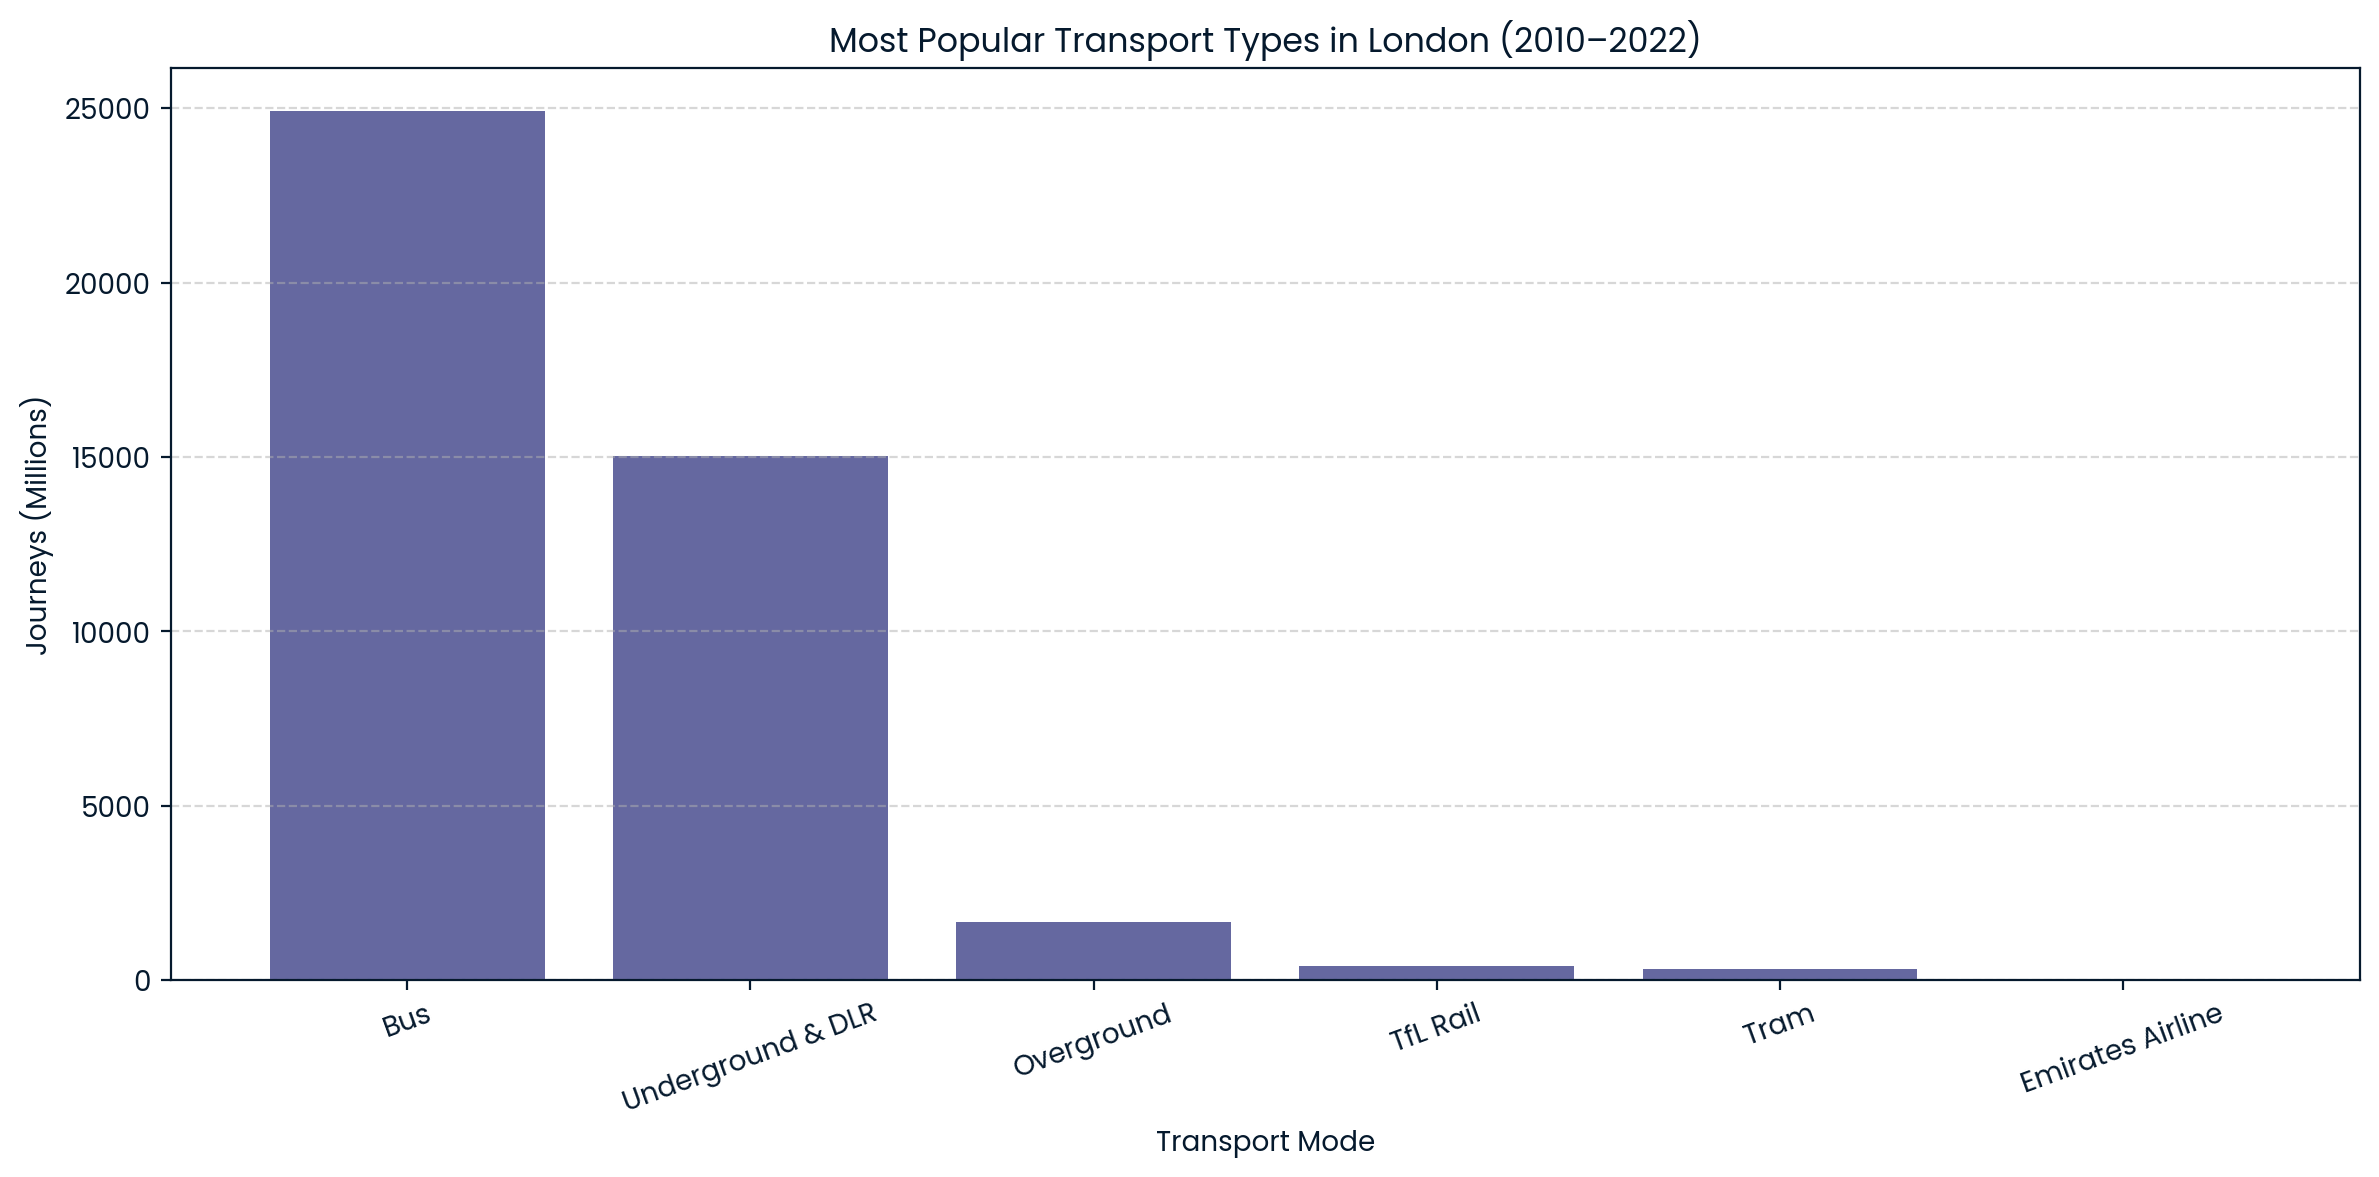

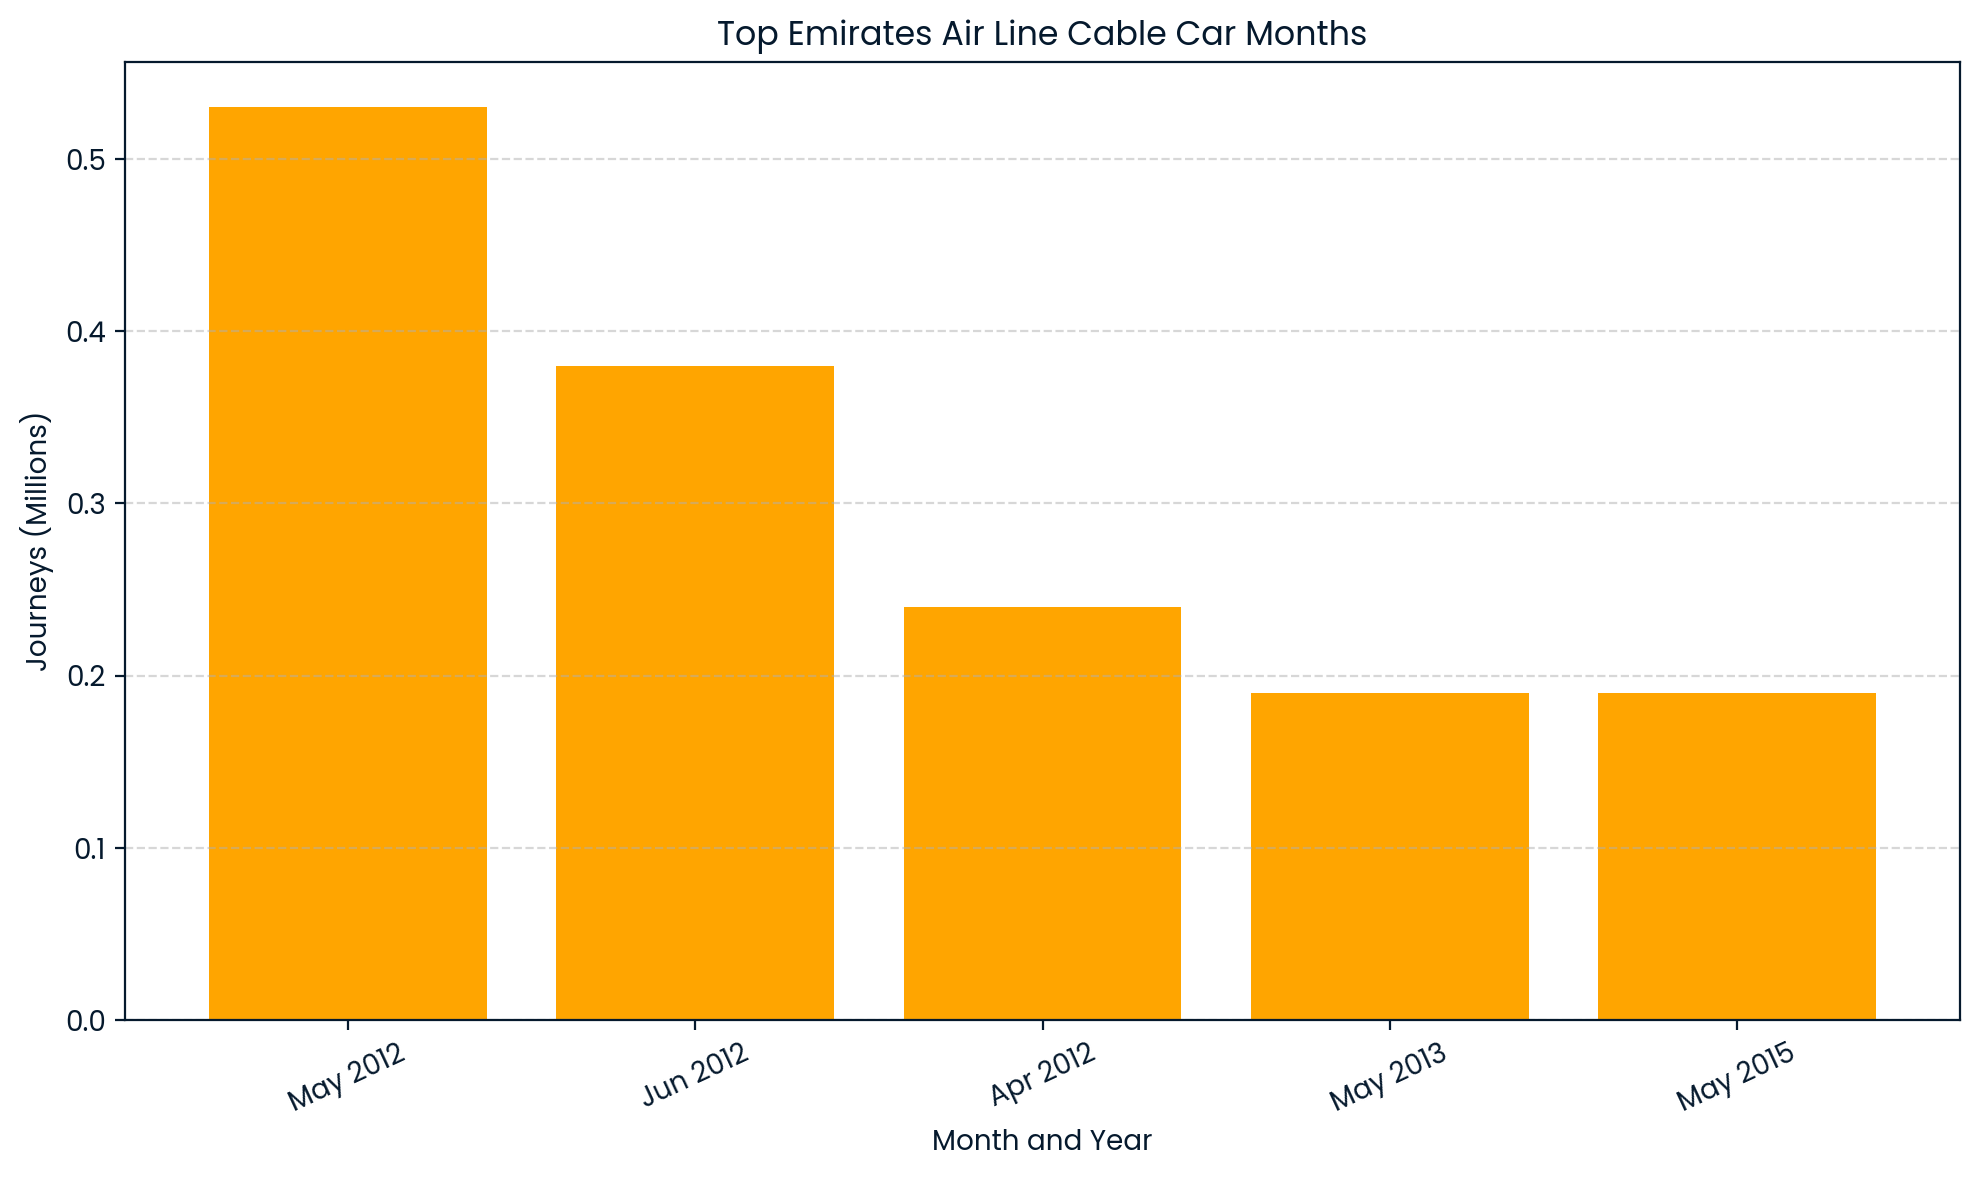

In [5]:
import matplotlib.pyplot as plt

#-------------------------
# Chart 1: Transport Popularity
#-------------------------
modes = ["Bus", "Underground & DLR", "Overground", "TfL Rail", "Tram", "Emirates Airline"]
values = [24905.19, 15020.47, 1666.85, 411.31, 314.69, 14.58]

plt.figure(figsize=(12,6))
plt.bar(modes, values)
plt.title("Most Popular Transport Types in London (2010–2022)")
plt.xlabel("Transport Mode")
plt.ylabel("Journeys (Millions)")
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("transport_popularity.png", dpi=200)
plt.show()


#-------------------------
# Chart 2: Emirates Air Line Top Months
#-------------------------
months = ["May 2012", "Jun 2012", "Apr 2012", "May 2013", "May 2015"]
cable_values = [0.53, 0.38, 0.24, 0.19, 0.19]

plt.figure(figsize=(10,6))
plt.bar(months, cable_values, color="orange")
plt.title("Top Emirates Air Line Cable Car Months")
plt.xlabel("Month and Year")
plt.ylabel("Journeys (Millions)")
plt.xticks(rotation=25)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("emirates_airline_popularity.png", dpi=200)
plt.show()